<a href="https://colab.research.google.com/github/norayehia/Dl-winequlity/blob/main/Ann0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


input_shape=[num_columns]. The reason Keras uses a list here is to permit use of more complex datasets. Image data, for instance, might need three dimensions: [height, width, channels].



https://www.kaggle.com/code/ryanholbrook/stochastic-gradient-descent


neural

In [ ]:
!pip install tensorflow

In [ ]:


from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


DL

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers

    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Stochastic Gradient Descent  https://www.kaggle.com/code/ryanholbrook/stochastic-gradient-descent


Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:

    1.Sample some training data and run it through the network to make predictions.
    2.Measure the loss between the predictions and the true values.
    3.Finally, adjust the weights in a direction that makes the loss smaller.


Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.

The animation shows the linear model from Lesson 1 being trained with SGD. The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new minibatch, it will shift the weights (w the slope and b the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.
Learning Rate and Batch Size

Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the learning rate. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

##lets use Adam as type of (sgd) Stochastic Gradient Descent

#example Classfication



#prepartion and visulization

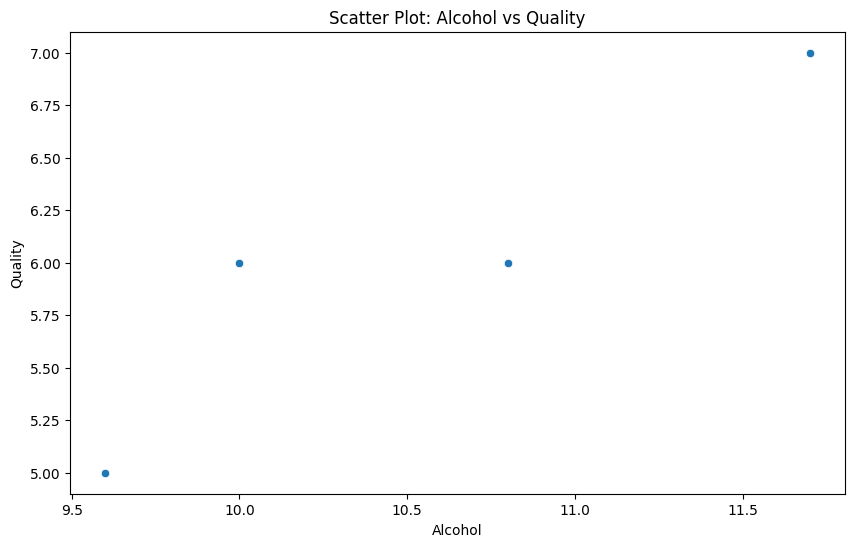

<ipython-input-3-13bc0a0077b0>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality', y='alcohol', data=df, ci=None)


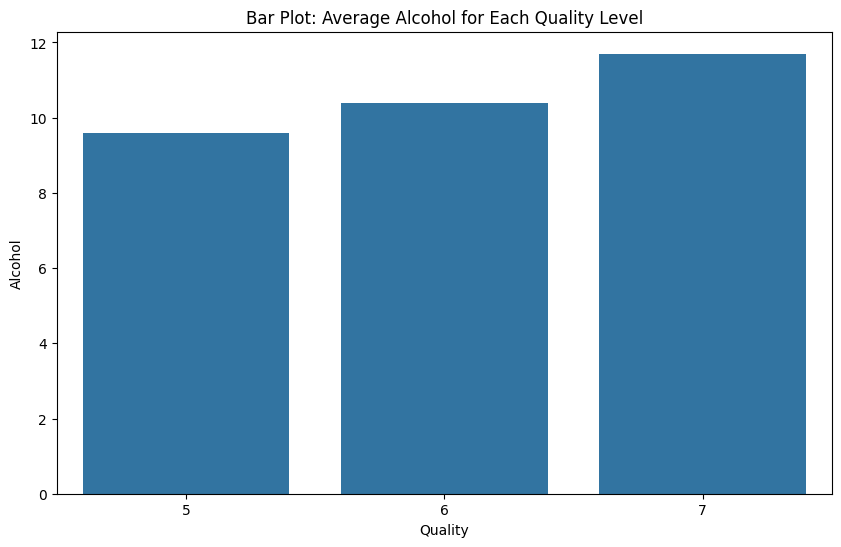

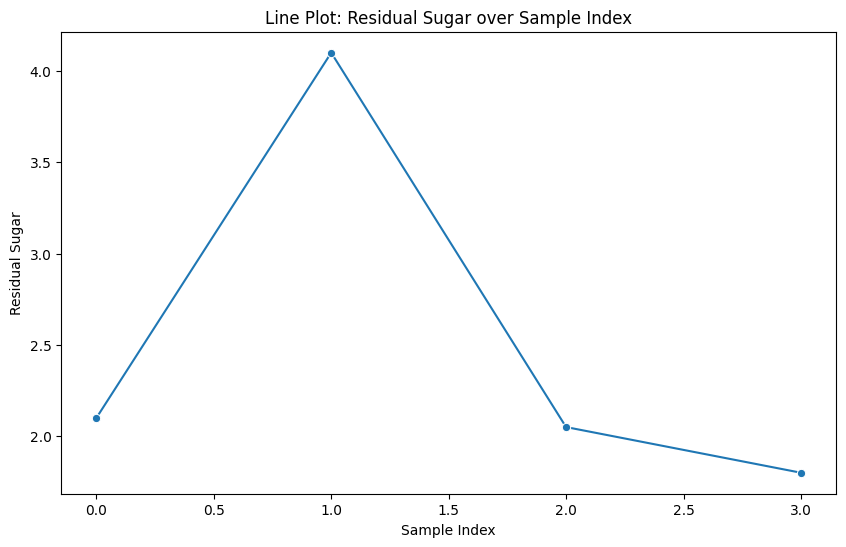

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data based on the provided image
data = {
    'fixed acidity': [10.8, 8.1, 9.1, 10.2],
    'volatile acidity': [0.470, 0.820, 0.290, 0.645],
    'citric acid': [0.43, 0.00, 0.33, 0.36],
    'residual sugar': [2.10, 4.10, 2.05, 1.80],
    'chlorides': [0.171, 0.095, 0.063, 0.053],
    'free sulfur dioxide': [27.0, 5.0, 13.0, 5.0],
    'total sulfur dioxide': [66.0, 14.0, 27.0, 14.0],
    'density': [0.99820, 0.99854, 0.99516, 0.99820],
    'pH': [3.17, 3.36, 3.26, 3.17],
    'sulphates': [0.76, 0.53, 0.84, 0.42],
    'alcohol': [10.8, 9.6, 11.7, 10.0],
    'quality': [6, 5, 7, 6]
}

df = pd.DataFrame(data)

# Scatter Plot: alcohol vs quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Scatter Plot: Alcohol vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

# Bar Plot: average alcohol for each quality level
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=df, ci=None)
plt.title('Bar Plot: Average Alcohol for Each Quality Level')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

# Line Plot: residual sugar vs sample index
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(df)), y='residual sugar', data=df, marker='o')
plt.title('Line Plot: Residual Sugar over Sample Index')
plt.xlabel('Sample Index')
plt.ylabel('Residual Sugar')
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/winequality-red.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)



display(df_train.head(4))



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
display(df_valid.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
display(df_train.head(4))

#prepare input

df_train - min_: Subtracts the minimum value of each column from the corresponding column values in df_train.
(max_ - min_): Calculates the range (maximum value - minimum value) for each column.
(df_train - min_) / (max_ - min_): Divides the centered column values by the range of the column, scaling the values to the range [0, 1

In [ ]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)


In [ ]:

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [ ]:
y_train

1109    0.6
1032    0.4
1002    0.8
487     0.6
979     0.4
       ... 
640     0.4
104     0.4
815     0.4
998     0.6
1075    0.8
Name: quality, Length: 1119, dtype: float64

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692
...,...,...,...,...,...,...,...,...,...,...,...
640,0.469027,0.287671,0.569620,0.107692,0.064125,0.211268,0.120141,0.687738,0.504854,0.175758,0.153846
104,0.230088,0.253425,0.303797,0.100000,0.062392,0.056338,0.106007,0.451637,0.446602,0.090909,0.153846
815,0.548673,0.226027,0.417722,0.123077,0.112652,0.267606,0.113074,0.617669,0.359223,0.230303,0.369231
998,0.380531,0.493151,0.430380,0.038462,0.027730,0.042254,0.014134,0.416603,0.242718,0.090909,0.107692


In [ ]:


print(X_train.shape)



(1119, 11)


#modeling

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [ ]:


model.compile(
    optimizer='adam',
    loss='mae',
)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 78ms/step - loss: 0.2797 - val_loss: 0.1369
Epoch 2/10
5/5 [==============================] - 0s 35ms/step - loss: 0.1390 - val_loss: 0.1253
Epoch 3/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1263 - val_loss: 0.1170
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1154 - val_loss: 0.1103
Epoch 5/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1126 - val_loss: 0.1194
Epoch 6/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1132 - val_loss: 0.1068
Epoch 7/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1084 - val_loss: 0.1112
Epoch 8/10
5/5 [==============================] - 0s 38ms/step - loss: 0.1075 - val_loss: 0.1036
Epoch 9/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1049 - val_loss: 0.1022
Epoch 10/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1040 - val_loss: 0.1112


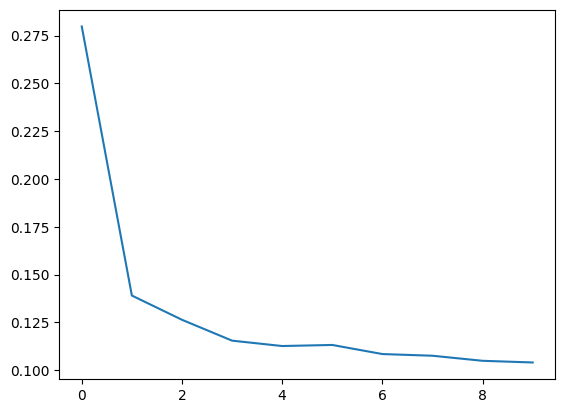

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();